### Monitoring of the water extent of Lake Neusiedl and the Lacken:
#### Train and Evaluation

In [5]:
# #
# import sys
# #
# from google.colab import drive
# #
# drive.mount('/content/drive')
# #
# sys.path.append('/content/drive/MyDrive/IntProject')

In [6]:

# import sys
# 
# #
# del sys.modules['data_func']
# del sys.modules['utils']
# del sys.modules['model']


In [7]:
# pip install yeoda

In [8]:
# pip install tifftools

In [9]:
import torch
import copy
import numpy as np
from data_func import merge_files_and_split, ImageDataset, make_list, visualize_augmentations, \
    visualize_offline_augmentations
from model import DownSample, DoubleConv, OutConv, UpSample, UNet
from utils import *
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
from torch import optim, nn
import cv2
import time
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torch.optim import Adam
from torch import permute
from torch import nan_to_num
from torch.nn import BCEWithLogitsLoss
from torchvision.transforms import ToTensor
import rasterio
from torch import nn
from torch import optim, nn
from torch.utils.data import TensorDataset, DataLoader, Dataset
import os
from torch.nn import functional as F

os.environ["NO_ALBUMENTATIONS_UPDATE"] = "1"
import albumentations as A

from torch.cuda.amp import autocast, GradScaler
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import warnings
import rasterio

warnings.filterwarnings("ignore", category=rasterio.errors.NotGeoreferencedWarning)


/Users/nadia/PycharmProjects/InterdisciplinaryProject/utils.py:103: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  grad_scaler = torch.cuda.amp.GradScaler()
/opt/anaconda3/lib/python3.12/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [10]:
# pip install tqdm

In [11]:
# pip install torchvision

### Data Preparation & Augmentation

In [12]:
train_batch_size = 32
val_batch_size = 16
test_batch_size = 4

In [13]:
train_transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
], )
test_transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), ], )


In [23]:

train_set = ImageDataset('./augmentations/train/', './augmentations/train_mask',
                         './augmentations/train_mask_lacken', train_transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=train_batch_size, shuffle=True, num_workers=2)
val_set = ImageDataset('./augmentations/val/', './augmentations/val_mask', './augmentations/val_mask_lacken',
                       train_transform)
valloader = torch.utils.data.DataLoader(val_set, batch_size=val_batch_size, shuffle=True, num_workers=2)
test_set = ImageDataset('./augmentations/test/', './augmentations/test_mask', './augmentations/test_mask_lacken',
                        train_transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size, shuffle=True, num_workers=2)
dict_file = './model_results_offf.csv'
model_file = 'model3_old.pt'


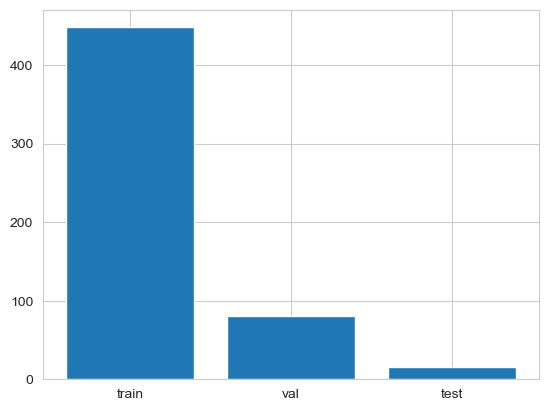

In [15]:
dataset_sizes = [len(train_set), len(val_set), len(test_set)]
labels = ['train', 'val', 'test']

plt.bar(labels, dataset_sizes)
plt.show()

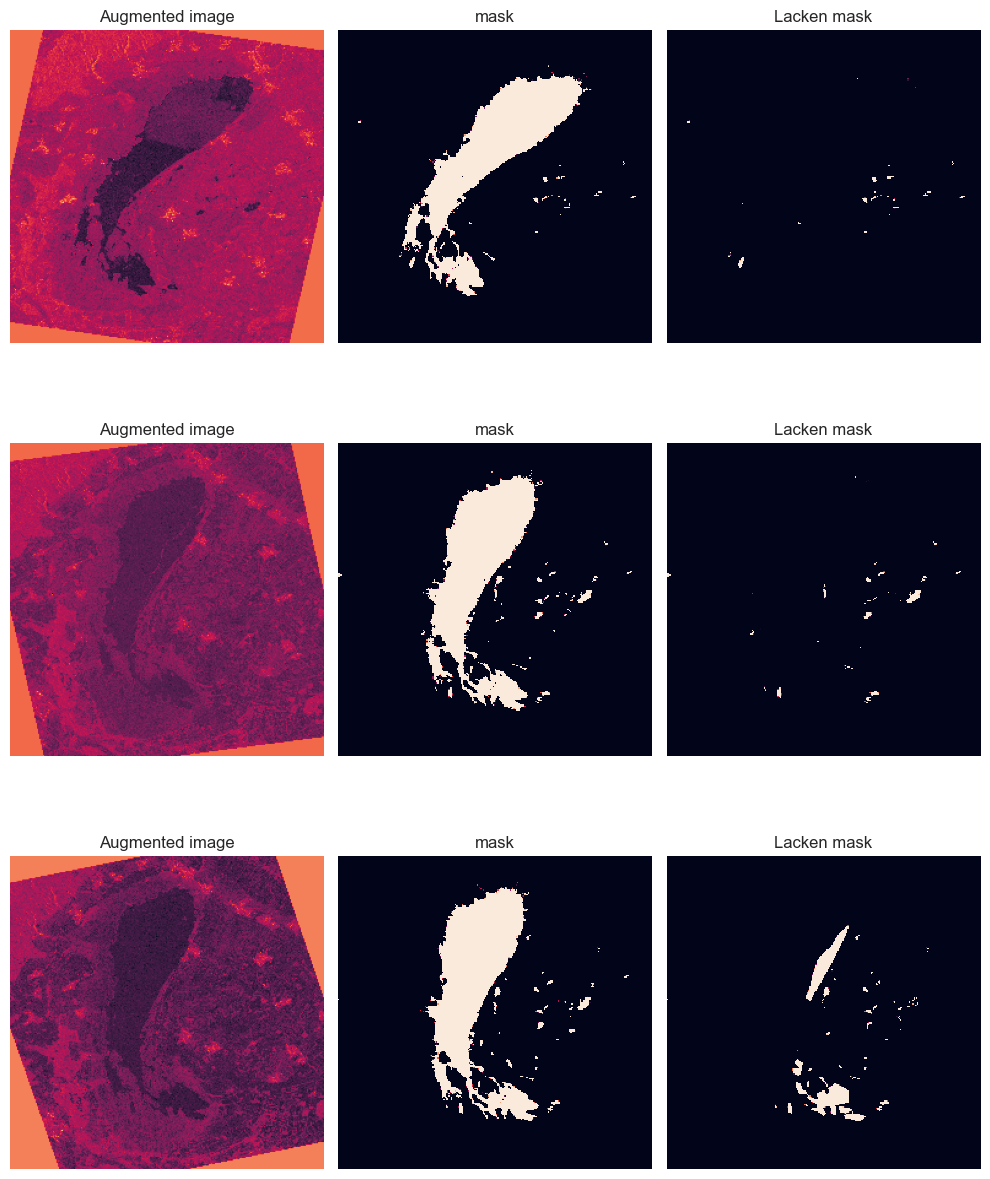

In [16]:
visualize_offline_augmentations(train_set, samples=3)


#### Train & Evaluate

In [21]:
epochs = 50
model = UNet(1, 1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()
global_step = 0

In [22]:
train_evaluate(model, epochs, valloader, valloader, optimizer, criterion, dict_file,
               model_file, best_dice=0, patience=10)

  0%|          | 0/50 [00:00<?, ?it/s]/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The id

 
 Epoch: 1 
TRAIN FULL: Train Loss: 1.3287 | Train DICE Coeff: 0.4210  | Train IoU Coeff: 0.2246| | Train Bal Accuracy: 69.09 | Train Accuracy: 64.76 
TRAIN LACKENS: Train DICE Coeff: 0.0048  | Train IoU Coeff: 0.0030|  | Train Bal Accuracy: 55.71 |  Train Accuracy: 59.10 
VAL FULL: Val Loss: 2.0307 | Val DICE Coeff: 0.2110 | Val IoU Coeff: 0.1180 | Val Bal Accuracy: 50.00 | Val Accuracy: 11.69 
VAL LACKENS: Val DICE Coeff: 0.0045 | Val IoU Coeff: 0.0022 | Val Bal Accuracy: 50.00 |  Val Accuracy: 0.21| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 2 
TRAIN FULL: Train Loss: 1.0967 | Train DICE Coeff: 0.5702  | Train IoU Coeff: 0.3730| | Train Bal Accuracy: 81.18 | Train Accuracy: 83.93 
TRAIN LACKENS: Train DICE Coeff: 0.0048  | Train IoU Coeff: 0.0036|  | Train Bal Accuracy: 55.47 |  Train Accuracy: 77.56 
VAL FULL: Val Loss: 2.8075 | Val DICE Coeff: 0.2110 | Val IoU Coeff: 0.1180 | Val Bal Accuracy: 50.00 | Val Accuracy: 11.69 
VAL LACKENS: Val DICE Coeff: 0.0045 | Val IoU Coeff: 0.0022 | Val Bal Accuracy: 50.00 |  Val Accuracy: 0.21| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 3 
TRAIN FULL: Train Loss: 0.9814 | Train DICE Coeff: 0.5969  | Train IoU Coeff: 0.4335| | Train Bal Accuracy: 82.43 | Train Accuracy: 88.23 
TRAIN LACKENS: Train DICE Coeff: 0.0059  | Train IoU Coeff: 0.0032|  | Train Bal Accuracy: 52.87 |  Train Accuracy: 82.49 
VAL FULL: Val Loss: 3.9259 | Val DICE Coeff: 0.2120 | Val IoU Coeff: 0.1185 | Val Bal Accuracy: 50.24 | Val Accuracy: 12.19 
VAL LACKENS: Val DICE Coeff: 0.0045 | Val IoU Coeff: 0.0023 | Val Bal Accuracy: 50.28 |  Val Accuracy: 0.71| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 4 
TRAIN FULL: Train Loss: 0.8275 | Train DICE Coeff: 0.7716  | Train IoU Coeff: 0.6436| | Train Bal Accuracy: 88.32 | Train Accuracy: 94.27 
TRAIN LACKENS: Train DICE Coeff: 0.0013  | Train IoU Coeff: 0.0007|  | Train Bal Accuracy: 46.08 |  Train Accuracy: 87.13 
VAL FULL: Val Loss: 5.8956 | Val DICE Coeff: 0.2181 | Val IoU Coeff: 0.1223 | Val Bal Accuracy: 51.76 | Val Accuracy: 15.29 
VAL LACKENS: Val DICE Coeff: 0.0047 | Val IoU Coeff: 0.0023 | Val Bal Accuracy: 52.04 |  Val Accuracy: 3.81| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 5 
TRAIN FULL: Train Loss: 0.7363 | Train DICE Coeff: 0.8215  | Train IoU Coeff: 0.6926| | Train Bal Accuracy: 91.96 | Train Accuracy: 95.18 
TRAIN LACKENS: Train DICE Coeff: 0.0022  | Train IoU Coeff: 0.0012|  | Train Bal Accuracy: 47.07 |  Train Accuracy: 86.34 
VAL FULL: Val Loss: 10.1604 | Val DICE Coeff: 0.2179 | Val IoU Coeff: 0.1222 | Val Bal Accuracy: 51.75 | Val Accuracy: 15.18 
VAL LACKENS: Val DICE Coeff: 0.0047 | Val IoU Coeff: 0.0023 | Val Bal Accuracy: 51.98 |  Val Accuracy: 3.70| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 6 
TRAIN FULL: Train Loss: 0.7105 | Train DICE Coeff: 0.8081  | Train IoU Coeff: 0.6821| | Train Bal Accuracy: 90.71 | Train Accuracy: 95.17 
TRAIN LACKENS: Train DICE Coeff: 0.0018  | Train IoU Coeff: 0.0010|  | Train Bal Accuracy: 46.53 |  Train Accuracy: 87.00 
VAL FULL: Val Loss: 10.0525 | Val DICE Coeff: 0.2342 | Val IoU Coeff: 0.1317 | Val Bal Accuracy: 55.00 | Val Accuracy: 22.13 
VAL LACKENS: Val DICE Coeff: 0.0051 | Val IoU Coeff: 0.0025 | Val Bal Accuracy: 55.92 |  Val Accuracy: 10.65| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 7 
TRAIN FULL: Train Loss: 0.6657 | Train DICE Coeff: 0.8154  | Train IoU Coeff: 0.7060| | Train Bal Accuracy: 89.77 | Train Accuracy: 95.89 
TRAIN LACKENS: Train DICE Coeff: 0.0020  | Train IoU Coeff: 0.0011|  | Train Bal Accuracy: 47.30 |  Train Accuracy: 88.45 
VAL FULL: Val Loss: 15.7947 | Val DICE Coeff: 0.2354 | Val IoU Coeff: 0.1330 | Val Bal Accuracy: 54.96 | Val Accuracy: 23.01 
VAL LACKENS: Val DICE Coeff: 0.0050 | Val IoU Coeff: 0.0025 | Val Bal Accuracy: 56.41 |  Val Accuracy: 11.53| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 8 
TRAIN FULL: Train Loss: 0.6166 | Train DICE Coeff: 0.8320  | Train IoU Coeff: 0.7096| | Train Bal Accuracy: 91.66 | Train Accuracy: 95.72 
TRAIN LACKENS: Train DICE Coeff: 0.0045  | Train IoU Coeff: 0.0023|  | Train Bal Accuracy: 50.24 |  Train Accuracy: 87.23 
VAL FULL: Val Loss: 2.3673 | Val DICE Coeff: 0.3475 | Val IoU Coeff: 0.2093 | Val Bal Accuracy: 62.00 | Val Accuracy: 55.57 
VAL LACKENS: Val DICE Coeff: 0.0063 | Val IoU Coeff: 0.0032 | Val Bal Accuracy: 74.67 |  Val Accuracy: 44.14| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 9 
TRAIN FULL: Train Loss: 0.5738 | Train DICE Coeff: 0.8438  | Train IoU Coeff: 0.7444| | Train Bal Accuracy: 91.05 | Train Accuracy: 96.49 
TRAIN LACKENS: Train DICE Coeff: 0.0019  | Train IoU Coeff: 0.0009|  | Train Bal Accuracy: 46.89 |  Train Accuracy: 88.54 
VAL FULL: Val Loss: 2.1304 | Val DICE Coeff: 0.3263 | Val IoU Coeff: 0.2081 | Val Bal Accuracy: 54.12 | Val Accuracy: 67.45 
VAL LACKENS: Val DICE Coeff: 0.0049 | Val IoU Coeff: 0.0027 | Val Bal Accuracy: 69.53 |  Val Accuracy: 62.33| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 10 
TRAIN FULL: Train Loss: 0.5126 | Train DICE Coeff: 0.8748  | Train IoU Coeff: 0.7803| | Train Bal Accuracy: 92.73 | Train Accuracy: 97.00 
TRAIN LACKENS: Train DICE Coeff: 0.0021  | Train IoU Coeff: 0.0010|  | Train Bal Accuracy: 47.01 |  Train Accuracy: 88.30 
VAL FULL: Val Loss: 1.3884 | Val DICE Coeff: 0.2241 | Val IoU Coeff: 0.2174 | Val Bal Accuracy: 57.42 | Val Accuracy: 79.06 
VAL LACKENS: Val DICE Coeff: 0.0083 | Val IoU Coeff: 0.0038 | Val Bal Accuracy: 66.20 |  Val Accuracy: 79.29| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 11 
TRAIN FULL: Train Loss: 0.4634 | Train DICE Coeff: 0.8887  | Train IoU Coeff: 0.7975| | Train Bal Accuracy: 93.96 | Train Accuracy: 97.21 
TRAIN LACKENS: Train DICE Coeff: 0.0008  | Train IoU Coeff: 0.0004|  | Train Bal Accuracy: 44.97 |  Train Accuracy: 87.88 
VAL FULL: Val Loss: 1.0347 | Val DICE Coeff: 0.2921 | Val IoU Coeff: 0.2222 | Val Bal Accuracy: 53.25 | Val Accuracy: 89.87 
VAL LACKENS: Val DICE Coeff: 0.0101 | Val IoU Coeff: 0.0053 | Val Bal Accuracy: 61.72 |  Val Accuracy: 95.78| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 12 
TRAIN FULL: Train Loss: 0.4149 | Train DICE Coeff: 0.9105  | Train IoU Coeff: 0.8366| | Train Bal Accuracy: 94.19 | Train Accuracy: 97.85 
TRAIN LACKENS: Train DICE Coeff: 0.0004  | Train IoU Coeff: 0.0001|  | Train Bal Accuracy: 44.69 |  Train Accuracy: 88.60 
VAL FULL: Val Loss: 0.7115 | Val DICE Coeff: 0.6904 | Val IoU Coeff: 0.4856 | Val Bal Accuracy: 56.48 | Val Accuracy: 89.25 
VAL LACKENS: Val DICE Coeff: 0.0050 | Val IoU Coeff: 0.0037 | Val Bal Accuracy: 87.10 |  Val Accuracy: 81.30| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 13 
TRAIN FULL: Train Loss: 0.3763 | Train DICE Coeff: 0.9171  | Train IoU Coeff: 0.8464| | Train Bal Accuracy: 95.30 | Train Accuracy: 97.94 
TRAIN LACKENS: Train DICE Coeff: 0.0011  | Train IoU Coeff: 0.0005|  | Train Bal Accuracy: 45.50 |  Train Accuracy: 88.12 
VAL FULL: Val Loss: 0.5815 | Val DICE Coeff: 0.7547 | Val IoU Coeff: 0.6517 | Val Bal Accuracy: 47.39 | Val Accuracy: 95.66 
VAL LACKENS: Val DICE Coeff: 0.0017 | Val IoU Coeff: 0.0007 | Val Bal Accuracy: 83.62 |  Val Accuracy: 91.48| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 14 
TRAIN FULL: Train Loss: 0.3700 | Train DICE Coeff: 0.9075  | Train IoU Coeff: 0.8315| | Train Bal Accuracy: 94.32 | Train Accuracy: 97.76 
TRAIN LACKENS: Train DICE Coeff: 0.0015  | Train IoU Coeff: 0.0007|  | Train Bal Accuracy: 46.29 |  Train Accuracy: 88.43 
VAL FULL: Val Loss: 0.5356 | Val DICE Coeff: 0.7997 | Val IoU Coeff: 0.6862 | Val Bal Accuracy: 48.77 | Val Accuracy: 95.94 
VAL LACKENS: Val DICE Coeff: 0.0033 | Val IoU Coeff: 0.0016 | Val Bal Accuracy: 86.49 |  Val Accuracy: 90.30| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 15 
TRAIN FULL: Train Loss: 0.3577 | Train DICE Coeff: 0.8999  | Train IoU Coeff: 0.8218| | Train Bal Accuracy: 94.61 | Train Accuracy: 97.56 
TRAIN LACKENS: Train DICE Coeff: 0.0021  | Train IoU Coeff: 0.0010|  | Train Bal Accuracy: 47.06 |  Train Accuracy: 88.00 
VAL FULL: Val Loss: 3.6548 | Val DICE Coeff: 0.4216 | Val IoU Coeff: 0.2127 | Val Bal Accuracy: 51.44 | Val Accuracy: 56.65 
VAL LACKENS: Val DICE Coeff: 0.0042 | Val IoU Coeff: 0.0024 | Val Bal Accuracy: 74.69 |  Val Accuracy: 45.46| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 16 
TRAIN FULL: Train Loss: 0.3169 | Train DICE Coeff: 0.9154  | Train IoU Coeff: 0.8427| | Train Bal Accuracy: 95.06 | Train Accuracy: 97.89 
TRAIN LACKENS: Train DICE Coeff: 0.0025  | Train IoU Coeff: 0.0012|  | Train Bal Accuracy: 47.73 |  Train Accuracy: 88.20 
VAL FULL: Val Loss: 0.4171 | Val DICE Coeff: 0.8604 | Val IoU Coeff: 0.7597 | Val Bal Accuracy: 49.64 | Val Accuracy: 96.60 
VAL LACKENS: Val DICE Coeff: 0.0038 | Val IoU Coeff: 0.0020 | Val Bal Accuracy: 93.36 |  Val Accuracy: 87.43| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 17 
TRAIN FULL: Train Loss: 0.3213 | Train DICE Coeff: 0.9029  | Train IoU Coeff: 0.8237| | Train Bal Accuracy: 95.11 | Train Accuracy: 97.54 
TRAIN LACKENS: Train DICE Coeff: 0.0036  | Train IoU Coeff: 0.0018|  | Train Bal Accuracy: 49.10 |  Train Accuracy: 87.73 
VAL FULL: Val Loss: 4.3849 | Val DICE Coeff: 0.4589 | Val IoU Coeff: 0.2198 | Val Bal Accuracy: 52.93 | Val Accuracy: 57.84 
VAL LACKENS: Val DICE Coeff: 0.0046 | Val IoU Coeff: 0.0025 | Val Bal Accuracy: 75.53 |  Val Accuracy: 46.57| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 18 
TRAIN FULL: Train Loss: 0.2697 | Train DICE Coeff: 0.9290  | Train IoU Coeff: 0.8675| | Train Bal Accuracy: 94.98 | Train Accuracy: 98.27 
TRAIN LACKENS: Train DICE Coeff: 0.0014  | Train IoU Coeff: 0.0007|  | Train Bal Accuracy: 46.33 |  Train Accuracy: 88.75 
VAL FULL: Val Loss: 1.1337 | Val DICE Coeff: 0.6678 | Val IoU Coeff: 0.4237 | Val Bal Accuracy: 58.62 | Val Accuracy: 83.77 
VAL LACKENS: Val DICE Coeff: 0.0060 | Val IoU Coeff: 0.0036 | Val Bal Accuracy: 89.90 |  Val Accuracy: 72.64| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 19 
TRAIN FULL: Train Loss: 0.2426 | Train DICE Coeff: 0.9356  | Train IoU Coeff: 0.8788| | Train Bal Accuracy: 96.42 | Train Accuracy: 98.38 
TRAIN LACKENS: Train DICE Coeff: 0.0026  | Train IoU Coeff: 0.0013|  | Train Bal Accuracy: 47.69 |  Train Accuracy: 88.10 
VAL FULL: Val Loss: 2.4629 | Val DICE Coeff: 0.6024 | Val IoU Coeff: 0.2808 | Val Bal Accuracy: 53.72 | Val Accuracy: 69.19 
VAL LACKENS: Val DICE Coeff: 0.0035 | Val IoU Coeff: 0.0026 | Val Bal Accuracy: 80.46 |  Val Accuracy: 58.73| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 20 
TRAIN FULL: Train Loss: 0.2279 | Train DICE Coeff: 0.9399  | Train IoU Coeff: 0.8869| | Train Bal Accuracy: 96.29 | Train Accuracy: 98.50 
TRAIN LACKENS: Train DICE Coeff: 0.0033  | Train IoU Coeff: 0.0016|  | Train Bal Accuracy: 48.64 |  Train Accuracy: 88.34 
VAL FULL: Val Loss: 1.4961 | Val DICE Coeff: 0.6343 | Val IoU Coeff: 0.3145 | Val Bal Accuracy: 56.20 | Val Accuracy: 74.71 
VAL LACKENS: Val DICE Coeff: 0.0044 | Val IoU Coeff: 0.0030 | Val Bal Accuracy: 83.69 |  Val Accuracy: 64.20| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 21 
TRAIN FULL: Train Loss: 0.2089 | Train DICE Coeff: 0.9435  | Train IoU Coeff: 0.8928| | Train Bal Accuracy: 96.60 | Train Accuracy: 98.57 
TRAIN LACKENS: Train DICE Coeff: 0.0043  | Train IoU Coeff: 0.0021|  | Train Bal Accuracy: 49.97 |  Train Accuracy: 88.28 
VAL FULL: Val Loss: 0.3014 | Val DICE Coeff: 0.8979 | Val IoU Coeff: 0.8110 | Val Bal Accuracy: 50.96 | Val Accuracy: 97.37 
VAL LACKENS: Val DICE Coeff: 0.0045 | Val IoU Coeff: 0.0025 | Val Bal Accuracy: 95.01 |  Val Accuracy: 87.58| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 22 
TRAIN FULL: Train Loss: 0.2015 | Train DICE Coeff: 0.9423  | Train IoU Coeff: 0.8908| | Train Bal Accuracy: 96.61 | Train Accuracy: 98.54 
TRAIN LACKENS: Train DICE Coeff: 0.0044  | Train IoU Coeff: 0.0021|  | Train Bal Accuracy: 50.21 |  Train Accuracy: 88.24 
VAL FULL: Val Loss: 0.3473 | Val DICE Coeff: 0.8643 | Val IoU Coeff: 0.7680 | Val Bal Accuracy: 52.26 | Val Accuracy: 97.04 
VAL LACKENS: Val DICE Coeff: 0.0064 | Val IoU Coeff: 0.0031 | Val Bal Accuracy: 90.07 |  Val Accuracy: 89.84| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 23 
TRAIN FULL: Train Loss: 0.1898 | Train DICE Coeff: 0.9452  | Train IoU Coeff: 0.8962| | Train Bal Accuracy: 96.56 | Train Accuracy: 98.62 
TRAIN LACKENS: Train DICE Coeff: 0.0049  | Train IoU Coeff: 0.0024|  | Train Bal Accuracy: 50.82 |  Train Accuracy: 88.38 
VAL FULL: Val Loss: 0.3216 | Val DICE Coeff: 0.8728 | Val IoU Coeff: 0.7718 | Val Bal Accuracy: 52.91 | Val Accuracy: 96.84 
VAL LACKENS: Val DICE Coeff: 0.0054 | Val IoU Coeff: 0.0031 | Val Bal Accuracy: 93.12 |  Val Accuracy: 87.94| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 24 
TRAIN FULL: Train Loss: 0.1799 | Train DICE Coeff: 0.9463  | Train IoU Coeff: 0.8980| | Train Bal Accuracy: 96.89 | Train Accuracy: 98.64 
TRAIN LACKENS: Train DICE Coeff: 0.0051  | Train IoU Coeff: 0.0025|  | Train Bal Accuracy: 51.16 |  Train Accuracy: 88.21 
VAL FULL: Val Loss: 0.4537 | Val DICE Coeff: 0.8011 | Val IoU Coeff: 0.6370 | Val Bal Accuracy: 54.85 | Val Accuracy: 93.52 
VAL LACKENS: Val DICE Coeff: 0.0062 | Val IoU Coeff: 0.0034 | Val Bal Accuracy: 94.21 |  Val Accuracy: 83.01| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 25 
TRAIN FULL: Train Loss: 0.1647 | Train DICE Coeff: 0.9505  | Train IoU Coeff: 0.9055| | Train Bal Accuracy: 96.82 | Train Accuracy: 98.74 
TRAIN LACKENS: Train DICE Coeff: 0.0049  | Train IoU Coeff: 0.0024|  | Train Bal Accuracy: 50.91 |  Train Accuracy: 88.39 
VAL FULL: Val Loss: 0.5539 | Val DICE Coeff: 0.6820 | Val IoU Coeff: 0.5556 | Val Bal Accuracy: 51.66 | Val Accuracy: 94.60 
VAL LACKENS: Val DICE Coeff: 0.0104 | Val IoU Coeff: 0.0032 | Val Bal Accuracy: 78.20 |  Val Accuracy: 93.05| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 26 
TRAIN FULL: Train Loss: 0.1564 | Train DICE Coeff: 0.9517  | Train IoU Coeff: 0.9078| | Train Bal Accuracy: 97.18 | Train Accuracy: 98.76 
TRAIN LACKENS: Train DICE Coeff: 0.0054  | Train IoU Coeff: 0.0026|  | Train Bal Accuracy: 51.52 |  Train Accuracy: 88.22 
VAL FULL: Val Loss: 0.2243 | Val DICE Coeff: 0.9165 | Val IoU Coeff: 0.8521 | Val Bal Accuracy: 50.10 | Val Accuracy: 98.12 
VAL LACKENS: Val DICE Coeff: 0.0045 | Val IoU Coeff: 0.0021 | Val Bal Accuracy: 93.43 |  Val Accuracy: 89.43| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 27 
TRAIN FULL: Train Loss: 0.1543 | Train DICE Coeff: 0.9509  | Train IoU Coeff: 0.9064| | Train Bal Accuracy: 96.89 | Train Accuracy: 98.75 
TRAIN LACKENS: Train DICE Coeff: 0.0055  | Train IoU Coeff: 0.0027|  | Train Bal Accuracy: 51.76 |  Train Accuracy: 88.38 
VAL FULL: Val Loss: 0.1845 | Val DICE Coeff: 0.9361 | Val IoU Coeff: 0.8816 | Val Bal Accuracy: 50.04 | Val Accuracy: 98.47 
VAL LACKENS: Val DICE Coeff: 0.0040 | Val IoU Coeff: 0.0020 | Val Bal Accuracy: 95.05 |  Val Accuracy: 89.00| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 28 
TRAIN FULL: Train Loss: 0.1512 | Train DICE Coeff: 0.9497  | Train IoU Coeff: 0.9040| | Train Bal Accuracy: 97.01 | Train Accuracy: 98.72 
TRAIN LACKENS: Train DICE Coeff: 0.0050  | Train IoU Coeff: 0.0025|  | Train Bal Accuracy: 51.33 |  Train Accuracy: 88.25 
VAL FULL: Val Loss: 0.2653 | Val DICE Coeff: 0.8845 | Val IoU Coeff: 0.7917 | Val Bal Accuracy: 48.66 | Val Accuracy: 97.12 
VAL LACKENS: Val DICE Coeff: 0.0033 | Val IoU Coeff: 0.0017 | Val Bal Accuracy: 94.07 |  Val Accuracy: 87.77| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 29 
TRAIN FULL: Train Loss: 0.1486 | Train DICE Coeff: 0.9485  | Train IoU Coeff: 0.9024| | Train Bal Accuracy: 96.81 | Train Accuracy: 98.70 
TRAIN LACKENS: Train DICE Coeff: 0.0060  | Train IoU Coeff: 0.0029|  | Train Bal Accuracy: 52.29 |  Train Accuracy: 88.35 
VAL FULL: Val Loss: 0.2208 | Val DICE Coeff: 0.9089 | Val IoU Coeff: 0.8328 | Val Bal Accuracy: 48.48 | Val Accuracy: 97.83 
VAL LACKENS: Val DICE Coeff: 0.0031 | Val IoU Coeff: 0.0015 | Val Bal Accuracy: 93.61 |  Val Accuracy: 88.96| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 30 
TRAIN FULL: Train Loss: 0.1428 | Train DICE Coeff: 0.9506  | Train IoU Coeff: 0.9060| | Train Bal Accuracy: 96.86 | Train Accuracy: 98.75 
TRAIN LACKENS: Train DICE Coeff: 0.0059  | Train IoU Coeff: 0.0029|  | Train Bal Accuracy: 52.54 |  Train Accuracy: 88.38 
VAL FULL: Val Loss: 0.8210 | Val DICE Coeff: 0.6517 | Val IoU Coeff: 0.4637 | Val Bal Accuracy: 57.49 | Val Accuracy: 86.97 
VAL LACKENS: Val DICE Coeff: 0.0066 | Val IoU Coeff: 0.0036 | Val Bal Accuracy: 90.20 |  Val Accuracy: 76.69| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 31 
TRAIN FULL: Train Loss: 0.1342 | Train DICE Coeff: 0.9528  | Train IoU Coeff: 0.9098| | Train Bal Accuracy: 97.16 | Train Accuracy: 98.79 
TRAIN LACKENS: Train DICE Coeff: 0.0050  | Train IoU Coeff: 0.0024|  | Train Bal Accuracy: 51.01 |  Train Accuracy: 88.26 
VAL FULL: Val Loss: 0.2646 | Val DICE Coeff: 0.8759 | Val IoU Coeff: 0.7662 | Val Bal Accuracy: 52.51 | Val Accuracy: 96.50 
VAL LACKENS: Val DICE Coeff: 0.0055 | Val IoU Coeff: 0.0029 | Val Bal Accuracy: 95.68 |  Val Accuracy: 86.10| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 32 
TRAIN FULL: Train Loss: 0.1373 | Train DICE Coeff: 0.9507  | Train IoU Coeff: 0.9058| | Train Bal Accuracy: 97.08 | Train Accuracy: 98.73 
TRAIN LACKENS: Train DICE Coeff: 0.0058  | Train IoU Coeff: 0.0028|  | Train Bal Accuracy: 52.05 |  Train Accuracy: 88.24 
VAL FULL: Val Loss: 0.4443 | Val DICE Coeff: 0.7853 | Val IoU Coeff: 0.6413 | Val Bal Accuracy: 54.09 | Val Accuracy: 93.72 
VAL LACKENS: Val DICE Coeff: 0.0066 | Val IoU Coeff: 0.0033 | Val Bal Accuracy: 93.92 |  Val Accuracy: 83.45| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 33 
TRAIN FULL: Train Loss: 0.1354 | Train DICE Coeff: 0.9504  | Train IoU Coeff: 0.9054| | Train Bal Accuracy: 96.74 | Train Accuracy: 98.74 
TRAIN LACKENS: Train DICE Coeff: 0.0044  | Train IoU Coeff: 0.0021|  | Train Bal Accuracy: 50.04 |  Train Accuracy: 88.43 
VAL FULL: Val Loss: 0.5944 | Val DICE Coeff: 0.7348 | Val IoU Coeff: 0.5672 | Val Bal Accuracy: 52.73 | Val Accuracy: 91.75 
VAL LACKENS: Val DICE Coeff: 0.0055 | Val IoU Coeff: 0.0029 | Val Bal Accuracy: 91.45 |  Val Accuracy: 82.20| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 34 
TRAIN FULL: Train Loss: 0.1291 | Train DICE Coeff: 0.9520  | Train IoU Coeff: 0.9083| | Train Bal Accuracy: 97.18 | Train Accuracy: 98.77 
TRAIN LACKENS: Train DICE Coeff: 0.0045  | Train IoU Coeff: 0.0022|  | Train Bal Accuracy: 50.29 |  Train Accuracy: 88.22 
VAL FULL: Val Loss: 0.2785 | Val DICE Coeff: 0.8594 | Val IoU Coeff: 0.7659 | Val Bal Accuracy: 50.33 | Val Accuracy: 97.10 
VAL LACKENS: Val DICE Coeff: 0.0050 | Val IoU Coeff: 0.0023 | Val Bal Accuracy: 88.96 |  Val Accuracy: 90.51| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 35 
TRAIN FULL: Train Loss: 0.1251 | Train DICE Coeff: 0.9536  | Train IoU Coeff: 0.9111| | Train Bal Accuracy: 97.06 | Train Accuracy: 98.81 
TRAIN LACKENS: Train DICE Coeff: 0.0058  | Train IoU Coeff: 0.0029|  | Train Bal Accuracy: 52.44 |  Train Accuracy: 88.36 
VAL FULL: Val Loss: 1.0120 | Val DICE Coeff: 0.3229 | Val IoU Coeff: 0.2260 | Val Bal Accuracy: 52.98 | Val Accuracy: 90.68 
VAL LACKENS: Val DICE Coeff: 0.0114 | Val IoU Coeff: 0.0062 | Val Bal Accuracy: 61.41 |  Val Accuracy: 97.00| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 36 
TRAIN FULL: Train Loss: 0.1219 | Train DICE Coeff: 0.9541  | Train IoU Coeff: 0.9122| | Train Bal Accuracy: 97.17 | Train Accuracy: 98.82 
TRAIN LACKENS: Train DICE Coeff: 0.0056  | Train IoU Coeff: 0.0027|  | Train Bal Accuracy: 51.94 |  Train Accuracy: 88.31 
VAL FULL: Val Loss: 0.3779 | Val DICE Coeff: 0.7938 | Val IoU Coeff: 0.7336 | Val Bal Accuracy: 49.88 | Val Accuracy: 96.71 
VAL LACKENS: Val DICE Coeff: 0.0059 | Val IoU Coeff: 0.0020 | Val Bal Accuracy: 87.36 |  Val Accuracy: 90.84| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 37 
TRAIN FULL: Train Loss: 0.1173 | Train DICE Coeff: 0.9553  | Train IoU Coeff: 0.9143| | Train Bal Accuracy: 97.15 | Train Accuracy: 98.85 
TRAIN LACKENS: Train DICE Coeff: 0.0050  | Train IoU Coeff: 0.0024|  | Train Bal Accuracy: 50.93 |  Train Accuracy: 88.35 
VAL FULL: Val Loss: 0.2300 | Val DICE Coeff: 0.8854 | Val IoU Coeff: 0.8178 | Val Bal Accuracy: 50.06 | Val Accuracy: 97.72 
VAL LACKENS: Val DICE Coeff: 0.0049 | Val IoU Coeff: 0.0020 | Val Bal Accuracy: 91.57 |  Val Accuracy: 89.91| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 38 
TRAIN FULL: Train Loss: 0.1133 | Train DICE Coeff: 0.9563  | Train IoU Coeff: 0.9162| | Train Bal Accuracy: 97.41 | Train Accuracy: 98.87 
TRAIN LACKENS: Train DICE Coeff: 0.0062  | Train IoU Coeff: 0.0030|  | Train Bal Accuracy: 52.60 |  Train Accuracy: 88.25 
VAL FULL: Val Loss: 0.2869 | Val DICE Coeff: 0.8500 | Val IoU Coeff: 0.7821 | Val Bal Accuracy: 51.00 | Val Accuracy: 97.28 
VAL LACKENS: Val DICE Coeff: 0.0064 | Val IoU Coeff: 0.0025 | Val Bal Accuracy: 89.93 |  Val Accuracy: 90.21| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 39 
TRAIN FULL: Train Loss: 0.1203 | Train DICE Coeff: 0.9529  | Train IoU Coeff: 0.9099| | Train Bal Accuracy: 96.87 | Train Accuracy: 98.80 
TRAIN LACKENS: Train DICE Coeff: 0.0055  | Train IoU Coeff: 0.0027|  | Train Bal Accuracy: 51.67 |  Train Accuracy: 88.45 
VAL FULL: Val Loss: 0.4584 | Val DICE Coeff: 0.7431 | Val IoU Coeff: 0.6653 | Val Bal Accuracy: 51.26 | Val Accuracy: 95.87 
VAL LACKENS: Val DICE Coeff: 0.0096 | Val IoU Coeff: 0.0028 | Val Bal Accuracy: 83.97 |  Val Accuracy: 91.59| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 40 
TRAIN FULL: Train Loss: 0.1211 | Train DICE Coeff: 0.9506  | Train IoU Coeff: 0.9058| | Train Bal Accuracy: 97.20 | Train Accuracy: 98.73 
TRAIN LACKENS: Train DICE Coeff: 0.0054  | Train IoU Coeff: 0.0027|  | Train Bal Accuracy: 51.69 |  Train Accuracy: 88.17 
VAL FULL: Val Loss: 0.9147 | Val DICE Coeff: 0.4131 | Val IoU Coeff: 0.3159 | Val Bal Accuracy: 56.82 | Val Accuracy: 91.41 
VAL LACKENS: Val DICE Coeff: 0.0162 | Val IoU Coeff: 0.0083 | Val Bal Accuracy: 66.32 |  Val Accuracy: 95.31| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 41 
TRAIN FULL: Train Loss: 0.1137 | Train DICE Coeff: 0.9541  | Train IoU Coeff: 0.9122| | Train Bal Accuracy: 96.98 | Train Accuracy: 98.83 
TRAIN LACKENS: Train DICE Coeff: 0.0045  | Train IoU Coeff: 0.0022|  | Train Bal Accuracy: 50.42 |  Train Accuracy: 88.42 
VAL FULL: Val Loss: 0.4643 | Val DICE Coeff: 0.7934 | Val IoU Coeff: 0.6424 | Val Bal Accuracy: 53.78 | Val Accuracy: 93.73 
VAL LACKENS: Val DICE Coeff: 0.0062 | Val IoU Coeff: 0.0032 | Val Bal Accuracy: 94.05 |  Val Accuracy: 83.38| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 42 
TRAIN FULL: Train Loss: 0.1102 | Train DICE Coeff: 0.9557  | Train IoU Coeff: 0.9151| | Train Bal Accuracy: 97.29 | Train Accuracy: 98.86 
TRAIN LACKENS: Train DICE Coeff: 0.0059  | Train IoU Coeff: 0.0029|  | Train Bal Accuracy: 52.38 |  Train Accuracy: 88.29 
VAL FULL: Val Loss: 0.7284 | Val DICE Coeff: 0.5360 | Val IoU Coeff: 0.4263 | Val Bal Accuracy: 61.75 | Val Accuracy: 92.50 
VAL LACKENS: Val DICE Coeff: 0.0161 | Val IoU Coeff: 0.0095 | Val Bal Accuracy: 72.80 |  Val Accuracy: 93.28| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 43 
TRAIN FULL: Train Loss: 0.1077 | Train DICE Coeff: 0.9565  | Train IoU Coeff: 0.9165| | Train Bal Accuracy: 97.19 | Train Accuracy: 98.88 
TRAIN LACKENS: Train DICE Coeff: 0.0055  | Train IoU Coeff: 0.0027|  | Train Bal Accuracy: 51.73 |  Train Accuracy: 88.38 
VAL FULL: Val Loss: 0.3023 | Val DICE Coeff: 0.8457 | Val IoU Coeff: 0.7458 | Val Bal Accuracy: 53.80 | Val Accuracy: 96.76 
VAL LACKENS: Val DICE Coeff: 0.0076 | Val IoU Coeff: 0.0036 | Val Bal Accuracy: 88.96 |  Val Accuracy: 90.06| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 44 
TRAIN FULL: Train Loss: 0.1048 | Train DICE Coeff: 0.9570  | Train IoU Coeff: 0.9174| | Train Bal Accuracy: 97.46 | Train Accuracy: 98.89 
TRAIN LACKENS: Train DICE Coeff: 0.0053  | Train IoU Coeff: 0.0026|  | Train Bal Accuracy: 51.52 |  Train Accuracy: 88.23 
VAL FULL: Val Loss: 0.3964 | Val DICE Coeff: 0.7850 | Val IoU Coeff: 0.7036 | Val Bal Accuracy: 49.64 | Val Accuracy: 96.35 
VAL LACKENS: Val DICE Coeff: 0.0066 | Val IoU Coeff: 0.0019 | Val Bal Accuracy: 85.81 |  Val Accuracy: 91.21| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 45 
TRAIN FULL: Train Loss: 0.1024 | Train DICE Coeff: 0.9582  | Train IoU Coeff: 0.9197| | Train Bal Accuracy: 97.29 | Train Accuracy: 98.92 
TRAIN LACKENS: Train DICE Coeff: 0.0056  | Train IoU Coeff: 0.0027|  | Train Bal Accuracy: 51.86 |  Train Accuracy: 88.37 
VAL FULL: Val Loss: 0.1075 | Val DICE Coeff: 0.9555 | Val IoU Coeff: 0.9147 | Val Bal Accuracy: 49.52 | Val Accuracy: 98.87 
VAL LACKENS: Val DICE Coeff: 0.0037 | Val IoU Coeff: 0.0018 | Val Bal Accuracy: 96.83 |  Val Accuracy: 88.55| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 46 
TRAIN FULL: Train Loss: 0.1116 | Train DICE Coeff: 0.9530  | Train IoU Coeff: 0.9101| | Train Bal Accuracy: 97.16 | Train Accuracy: 98.79 
TRAIN LACKENS: Train DICE Coeff: 0.0057  | Train IoU Coeff: 0.0028|  | Train Bal Accuracy: 51.99 |  Train Accuracy: 88.28 
VAL FULL: Val Loss: 0.1778 | Val DICE Coeff: 0.9208 | Val IoU Coeff: 0.8505 | Val Bal Accuracy: 49.92 | Val Accuracy: 97.99 
VAL LACKENS: Val DICE Coeff: 0.0043 | Val IoU Coeff: 0.0021 | Val Bal Accuracy: 95.52 |  Val Accuracy: 88.13| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 47 
TRAIN FULL: Train Loss: 0.1103 | Train DICE Coeff: 0.9532  | Train IoU Coeff: 0.9105| | Train Bal Accuracy: 97.06 | Train Accuracy: 98.80 
TRAIN LACKENS: Train DICE Coeff: 0.0044  | Train IoU Coeff: 0.0022|  | Train Bal Accuracy: 50.26 |  Train Accuracy: 88.33 
VAL FULL: Val Loss: 0.2625 | Val DICE Coeff: 0.8749 | Val IoU Coeff: 0.7687 | Val Bal Accuracy: 55.01 | Val Accuracy: 96.49 
VAL LACKENS: Val DICE Coeff: 0.0069 | Val IoU Coeff: 0.0037 | Val Bal Accuracy: 96.28 |  Val Accuracy: 85.77| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 48 
TRAIN FULL: Train Loss: 0.1240 | Train DICE Coeff: 0.9452  | Train IoU Coeff: 0.8967| | Train Bal Accuracy: 96.51 | Train Accuracy: 98.63 
TRAIN LACKENS: Train DICE Coeff: 0.0052  | Train IoU Coeff: 0.0026|  | Train Bal Accuracy: 51.39 |  Train Accuracy: 88.41 
VAL FULL: Val Loss: 0.5341 | Val DICE Coeff: 0.7039 | Val IoU Coeff: 0.5797 | Val Bal Accuracy: 58.06 | Val Accuracy: 93.78 
VAL LACKENS: Val DICE Coeff: 0.0153 | Val IoU Coeff: 0.0051 | Val Bal Accuracy: 84.35 |  Val Accuracy: 88.67| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 49 
TRAIN FULL: Train Loss: 0.1318 | Train DICE Coeff: 0.9410  | Train IoU Coeff: 0.8892| | Train Bal Accuracy: 96.35 | Train Accuracy: 98.53 
TRAIN LACKENS: Train DICE Coeff: 0.0056  | Train IoU Coeff: 0.0028|  | Train Bal Accuracy: 51.85 |  Train Accuracy: 88.37 
VAL FULL: Val Loss: 0.9684 | Val DICE Coeff: 0.4403 | Val IoU Coeff: 0.3907 | Val Bal Accuracy: 51.67 | Val Accuracy: 90.98 
VAL LACKENS: Val DICE Coeff: 0.0039 | Val IoU Coeff: 0.0030 | Val Bal Accuracy: 72.93 |  Val Accuracy: 91.17| 


/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/miniconda3/envs/IntProject/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  data

 
 Epoch: 50 
TRAIN FULL: Train Loss: 0.1296 | Train DICE Coeff: 0.9415  | Train IoU Coeff: 0.8895| | Train Bal Accuracy: 96.17 | Train Accuracy: 98.54 
TRAIN LACKENS: Train DICE Coeff: 0.0039  | Train IoU Coeff: 0.0019|  | Train Bal Accuracy: 49.61 |  Train Accuracy: 88.47 
VAL FULL: Val Loss: 3.4595 | Val DICE Coeff: 0.3858 | Val IoU Coeff: 0.2294 | Val Bal Accuracy: 60.30 | Val Accuracy: 61.01 
VAL LACKENS: Val DICE Coeff: 0.0069 | Val IoU Coeff: 0.0032 | Val Bal Accuracy: 77.14 |  Val Accuracy: 49.90| 


In [17]:
data =pd.read_excel('./model_results_off.xlsx')
data.head(2)

epoch  train_loss  train_dice  train_iou  train_bal_acc train_acc  \
0      1      1.3287      0.4210     0.2246          69.09    64.76    
1      2      1.0967      0.5702     0.3730          81.18    83.93    

   val_loss  val_dice  val_iou  val_bal_acc  val_acc  train_l_dice  \
0    2.0307     0.211    0.118         50.0   11.69         0.0048   
1    2.8075     0.211    0.118         50.0   11.69         0.0048   

   train_l_iou  train_l_bal_acc train_l_acc  val_l_dice  val_l_iou  \
0       0.0030            55.71      59.10       0.0045     0.0022   
1       0.0036            55.47      77.56       0.0045     0.0022   

   val_bal_acc.1  val_acc.1  
0           50.0       0.21  
1           50.0       0.21

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   epoch            50 non-null     int64  
 1   train_loss       50 non-null     float64
 2   train_dice       50 non-null     float64
 3   train_iou        50 non-null     float64
 4   train_bal_acc    50 non-null     float64
 5   train_acc        50 non-null     object 
 6   val_loss         50 non-null     float64
 7   val_dice         50 non-null     float64
 8   val_iou          50 non-null     float64
 9   val_bal_acc      50 non-null     float64
 10  val_acc          50 non-null     object 
 11  train_l_dice     50 non-null     float64
 12  train_l_iou      50 non-null     float64
 13  train_l_bal_acc  50 non-null     float64
 14  train_l_acc      50 non-null     object 
 15  val_l_dice       50 non-null     float64
 16  val_l_iou        50 non-null     float64
 17  val_bal_acc.1    5

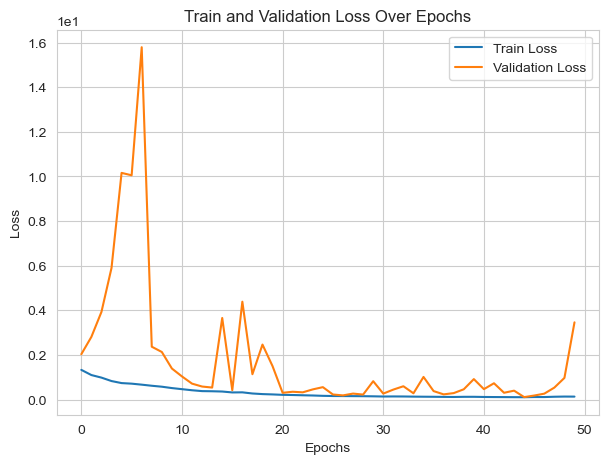

In [19]:
plt.figure(figsize=(7, 5))
plt.plot(data.index, data['train_loss'], label='Train Loss')
plt.plot(data.index, data['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss Over Epochs')
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.show()


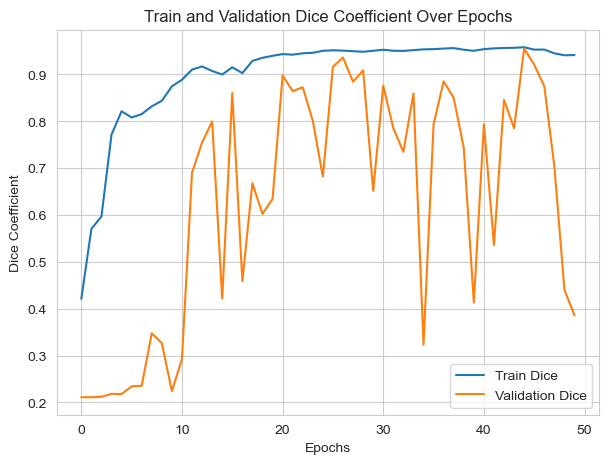

In [20]:
data['train_dice'] = pd.to_numeric(data['train_dice'])
data['val_dice'] = pd.to_numeric(data['val_dice'])
plt.figure(figsize=(7, 5))
plt.plot(data.index, data['train_dice'], label='Train Dice')
plt.plot(data.index, data['val_dice'], label='Validation Dice')

plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.title('Train and Validation Dice Coefficient Over Epochs')
plt.legend()
plt.show()


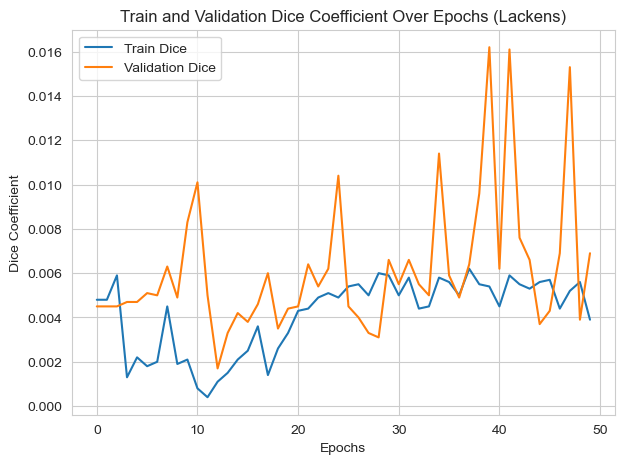

In [21]:
data['train_l_dice'] = pd.to_numeric(data['train_l_dice'])
data['val_l_dice'] = pd.to_numeric(data['val_l_dice'])
plt.figure(figsize=(7, 5))
plt.plot(data.index, data['train_l_dice'], label='Train Dice')
plt.plot(data.index, data['val_l_dice'], label='Validation Dice')

plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.title('Train and Validation Dice Coefficient Over Epochs (Lackens)')
plt.legend()
plt.show()




#### Evaluating on Test Data

In [24]:
model = UNet(1,1)
state_dict = torch.load(model_file)  # Load the state_dict
model.load_state_dict(state_dict)  # Load weights into the model
model = model.to(device)
model.eval()

/var/folders/kj/50p9jhyx70135t3lmjp58l9h0000gn/T/ipykernel_91913/1592167090.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_file)  # Load t

UNet(
  (inc): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): DownSample(
    (down): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=T

/opt/anaconda3/lib/python3.12/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwar

Dice Coefficient: 0.94544517993927
Dice Coefficient Lackens: 0.0018591100815683603
IoU: 0.8966741561889648
IoU Lackens: 0.0009188674157485366
Accuracy: 0.9537137746810913
Accuracy Lackens: 0.46399426460266113


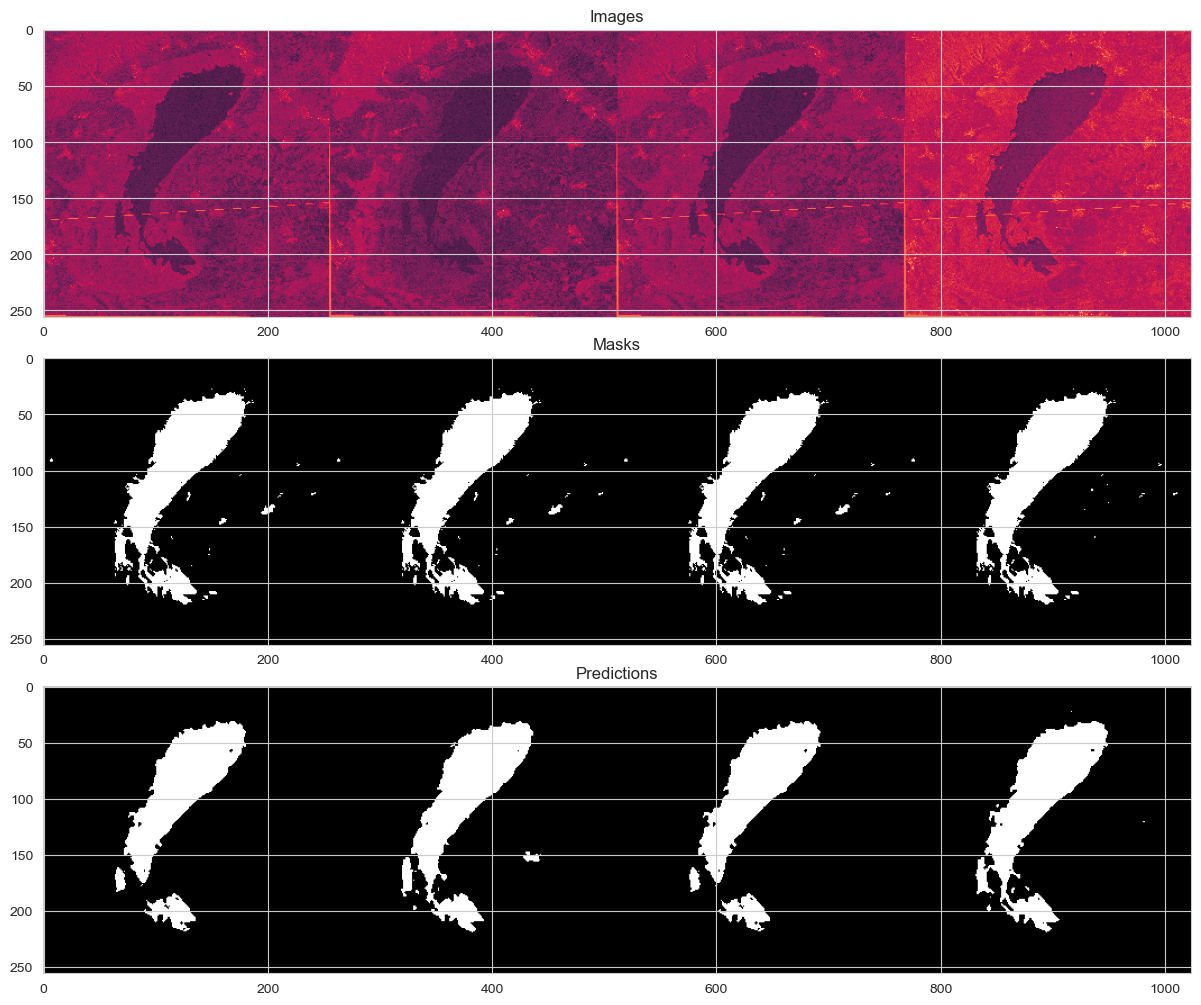

Dice Coefficient: 0.9526954889297485
Dice Coefficient Lackens: 0.0029089562594890594
IoU: 0.9097866415977478
IoU Lackens: 0.0014431951567530632
Accuracy: 0.9611111879348755
Accuracy Lackens: 0.47481927275657654


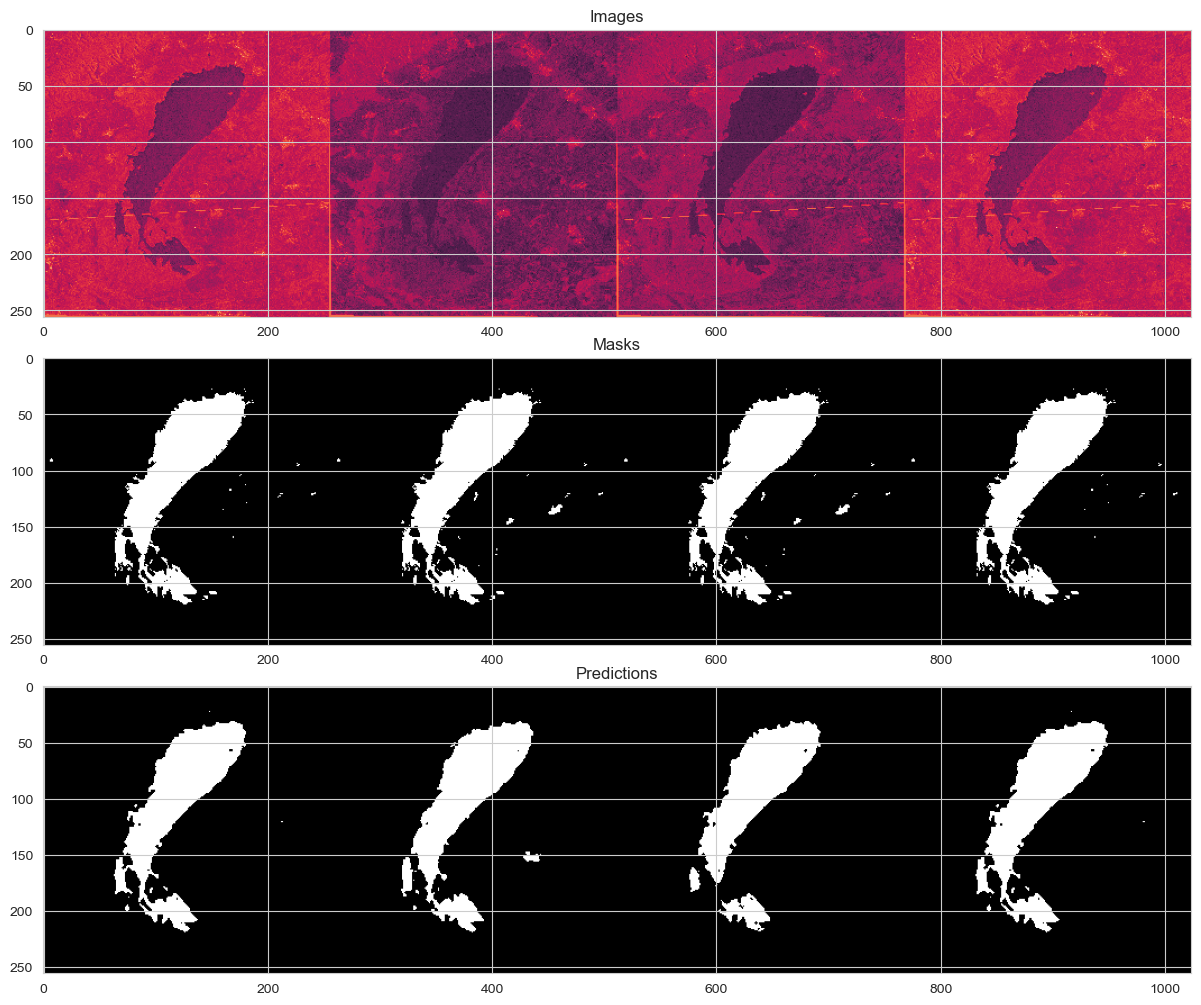

Dice Coefficient: 0.9532846212387085
Dice Coefficient Lackens: 0.007356918416917324
IoU: 0.9108860492706299
IoU Lackens: 0.0036844240967184305
Accuracy: 0.9618591070175171
Accuracy Lackens: 0.5373454093933105


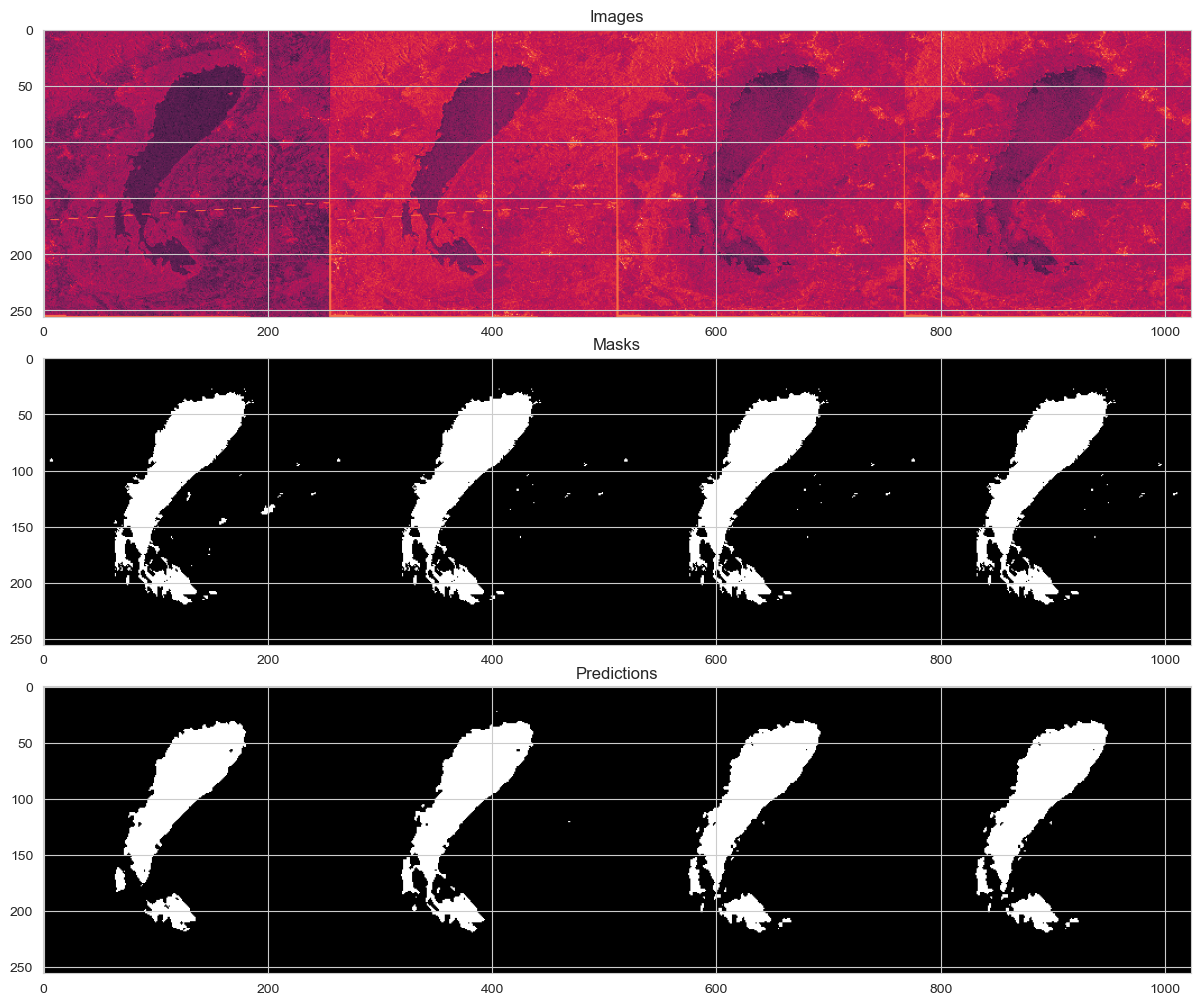

Dice Coefficient: 0.94730544090271
Dice Coefficient Lackens: 0.007647009566426277
IoU: 0.8998396396636963
IoU Lackens: 0.003805610816925764
Accuracy: 0.9599738121032715
Accuracy Lackens: 0.5961642265319824


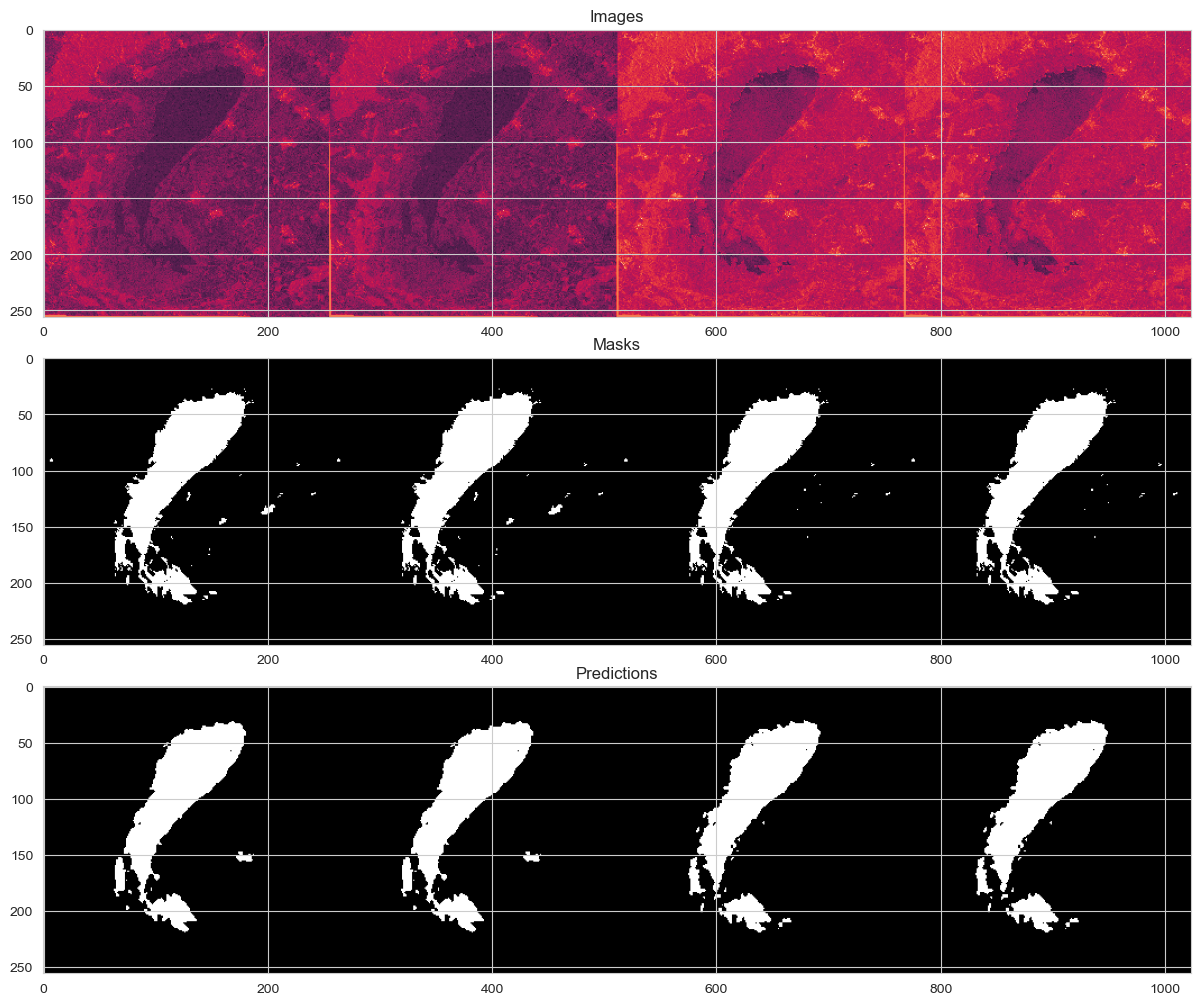

In [25]:

for images, masks, lacken_masks in testloader:
    with torch.no_grad():
        pred = model(images.to(device)).detach()
        pred = (pred > 0.5).float()

    display_batch(images, masks, pred, lacken_masks)
